<a href="https://colab.research.google.com/github/Morrissenzeyi/week-4-IP/blob/main/WEEK_4_IP_CORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis**

## **1. Defining the Question**

###**a) Specifying the Question**

To check if there is a viable difference between Bluecar usage on weekday or weekend.

###**b) Defining the metric for success**

To find out if the bluecars taken over the weekdays different from the bluecars taken over the weekend.



In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import zscore
from scipy import stats
from scipy.stats import zscore
%matplotlib inline
from scipy.stats import norm

In [2]:
# preview the dataset
df = pd.read_csv("/content/autolib_daily_events_postal_code.csv")
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [3]:
# checking the bottom of the dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [4]:
# preview info of out dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [5]:
# change date from object to date
df['date'] = pd.to_datetime(df['date'])
df.dtypes

Postal code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
dtype: object

In [6]:
# checking how big our data is
df.shape

(16085, 13)

In [7]:
df.count()

Postal code               16085
date                      16085
n_daily_data_points       16085
dayOfWeek                 16085
day_type                  16085
BlueCars_taken_sum        16085
BlueCars_returned_sum     16085
Utilib_taken_sum          16085
Utilib_returned_sum       16085
Utilib_14_taken_sum       16085
Utilib_14_returned_sum    16085
Slots_freed_sum           16085
Slots_taken_sum           16085
dtype: int64

In [8]:
# checking the duplicate
df.duplicated().sum()
df = df.drop_duplicates()
df.shape

(16085, 13)

In [9]:
# we can delete unneccessary collumns
df.drop(['Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum'], axis=1, inplace=True)
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,18,20


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


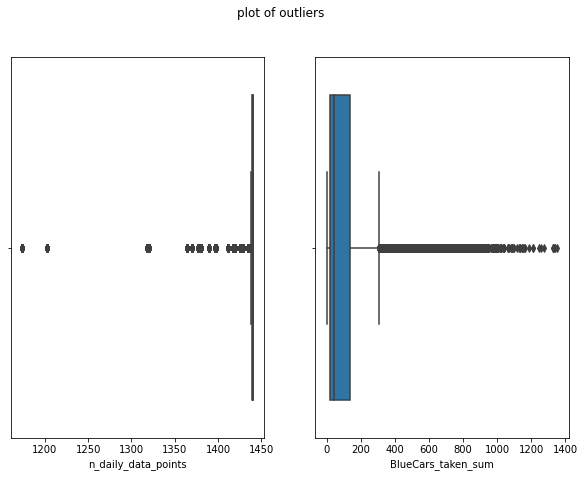

In [10]:
# checking for outliers
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,7))
fig.suptitle('plot of outliers')
sns.boxplot(df['n_daily_data_points'],ax=ax1)
sns.boxplot(df['BlueCars_taken_sum'], ax=ax2)

In [11]:
# Checking for anomalies
q1 = df.quantile(.25)
q3 = df.quantile(.75)

iqr =q3 -q1
print(iqr)

Postal code              2070.0
n_daily_data_points         1.0
dayOfWeek                   4.0
BlueCars_taken_sum        115.0
BlueCars_returned_sum     115.0
Slots_freed_sum             5.0
Slots_taken_sum             5.0
dtype: float64


In [12]:
#checking for null values
df.isnull().sum()

Postal code              0
date                     0
n_daily_data_points      0
dayOfWeek                0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
Slots_freed_sum          0
Slots_taken_sum          0
dtype: int64

# **Exploratory Analysis**

##**Univariate** **Analysis**

In [13]:
# frequency tables of day
df1 = df.day_type.value_counts()
print("The frequency of day type is: \n", df1)
print('\n')
#Frequency table of week day
df2 = df.dayOfWeek .value_counts()
print("The frequency of week_day is: \n", df2)
print('\n')

The frequency of day type is: 
 weekday    11544
weekend     4541
Name: day_type, dtype: int64


The frequency of week_day is: 
 0    2374
1    2363
6    2274
4    2271
3    2268
2    2268
5    2267
Name: dayOfWeek, dtype: int64




In [14]:
# measures of central tendency 
print('Measures of central tendency : ')
df_central_tendency = df[['BlueCars_returned_sum', 'BlueCars_taken_sum']]
print('Mean is: ')
print(df_central_tendency.mean())
print('Mode is: ')
print(df_central_tendency.mode())
print('Median is: ')
print(df_central_tendency.median())


Measures of central tendency : 
Mean is: 
BlueCars_returned_sum    125.912714
BlueCars_taken_sum       125.926951
dtype: float64
Mode is: 
   BlueCars_returned_sum  BlueCars_taken_sum
0                     13                  12
Median is: 
BlueCars_returned_sum    46.0
BlueCars_taken_sum       46.0
dtype: float64


In [15]:
# checking min, max and range
print('Minimum is: ')
print(df.min())
print('Maximum is: ')
print(df.max())

Minimum is: 
Postal code                            75001
date                     2018-01-01 00:00:00
n_daily_data_points                     1174
dayOfWeek                                  0
day_type                             weekday
BlueCars_taken_sum                         0
BlueCars_returned_sum                      0
Slots_freed_sum                            0
Slots_taken_sum                            0
dtype: object
Maximum is: 
Postal code                            95880
date                     2018-06-19 00:00:00
n_daily_data_points                     1440
dayOfWeek                                  6
day_type                             weekend
BlueCars_taken_sum                      1352
BlueCars_returned_sum                   1332
Slots_freed_sum                          360
Slots_taken_sum                          359
dtype: object


In [16]:
#Calculating measures of dispersion
print('Skew is: ')
print(df.skew())
print('Kurtosis is: ')
print(df.kurtosis())

Skew is: 
Postal code             -1.168778
n_daily_data_points     -5.742776
dayOfWeek                0.018824
BlueCars_taken_sum       2.406355
BlueCars_returned_sum    2.412085
Slots_freed_sum          2.597406
Slots_taken_sum          2.596904
dtype: float64
Kurtosis is: 
Postal code              -0.542143
n_daily_data_points      36.594846
dayOfWeek                -1.260994
BlueCars_taken_sum        6.172692
BlueCars_returned_sum     6.186288
Slots_freed_sum           6.454514
Slots_taken_sum           6.442553
dtype: float64


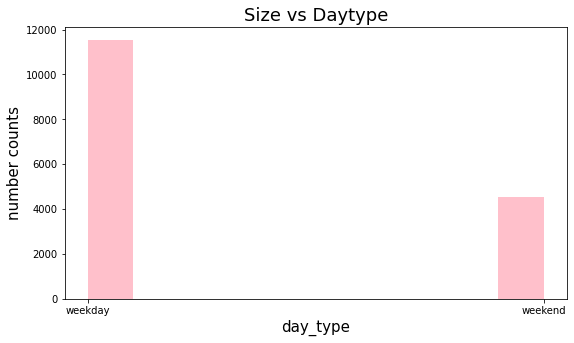

In [17]:
# drawing Histogram of  the day
daytype = df['day_type']
plt.figure(figsize=(9,5))
plt.hist(daytype, histtype='bar', color='pink')
plt.xlabel('day_type', color='black', fontsize=15)
plt.ylabel('number counts', color='black', fontsize=15)
plt.title('Size vs Daytype', color='black', fontsize=18)
plt.show()

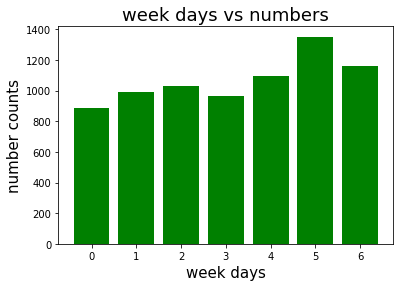

In [18]:
# days cars re most taken

plt.bar(df['dayOfWeek'],df['BlueCars_taken_sum'], color='green')
plt.xlabel('week days', color='black', fontsize=15)
plt.ylabel('number counts', color='black', fontsize=15)
plt.title('week days vs numbers', color='black', fontsize=18)
plt.show()

In [19]:
# Bivariate Analysis


In [20]:
# taken for weekends
df_taken= df[['BlueCars_returned_sum', 'BlueCars_taken_sum']]
df_taken.reset_index(drop=True, inplace= True)
df_taken.head()


,BlueCars_returned_sum,BlueCars_taken_sum
0,103,110
1,94,98
2,139,138
3,104,104
4,117,114


In [21]:
# now we Calculate correlation
correlation = df_taken.dropna().corr()
correlation

,BlueCars_returned_sum,BlueCars_taken_sum
BlueCars_returned_sum,1.00000,0.99866
BlueCars_taken_sum,0.99866,1.00000


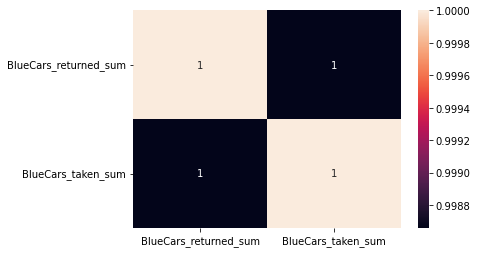

In [22]:
#plotting a correlation heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, 
            yticklabels=correlation.columns, annot=True)

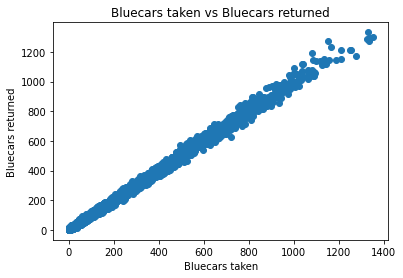

In [23]:

#Plotting scatter plots
plt.scatter(df_taken["BlueCars_taken_sum"] , df_taken["BlueCars_returned_sum"])
plt.title('Bluecars taken vs Bluecars returned')
plt.xlabel('Bluecars taken')
plt.ylabel('Bluecars returned')
plt.show()
# prefect correlation

In [24]:
# Multivariate analysis

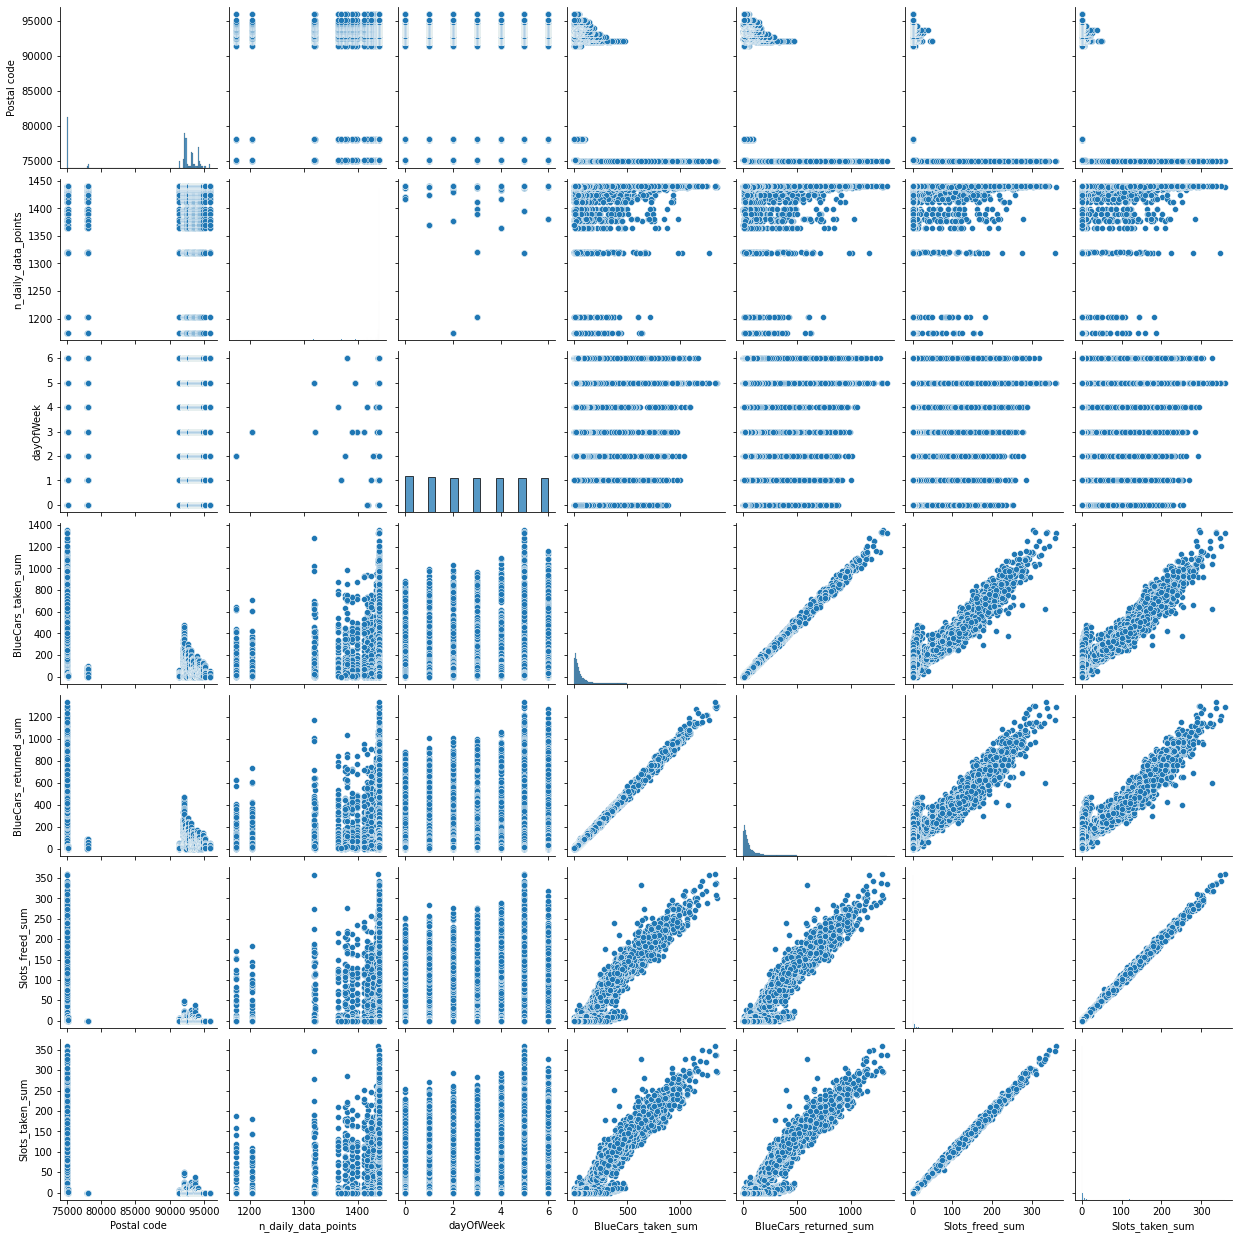

In [25]:
# pair plotting
sns.pairplot(df)
plt.show()

# **Hypothesis Testing**

I want to check which cars are mostly used between sunday and saturday

####H0 =  most cars are taken on saturday more than sunday
####H1 = most cars are taken on sunday than saturday

In [26]:
# sampling
wknd=df[(df['day_type']=='weekend')]
wknd.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
5,75001,2018-01-06,1437,5,weekend,187,185,38,35
6,75001,2018-01-07,1440,6,weekend,180,180,34,34
12,75001,2018-01-13,1440,5,weekend,224,223,38,38
13,75001,2018-01-14,1440,6,weekend,193,193,22,20
19,75001,2018-01-20,1439,5,weekend,217,217,41,39


In [27]:
# a Random Sampling 
wknd_sample = wknd.sample(n = 10, replace="False")
wknd_sample.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
14137,94160,2018-03-24,1440,5,weekend,83,80,6,5
9164,92410,2018-05-27,1440,6,weekend,26,18,0,0
5922,92190,2018-06-17,1440,6,weekend,90,84,0,0
7551,92310,2018-03-11,1440,6,weekend,71,66,0,0
7579,92310,2018-04-08,1440,6,weekend,80,80,0,0


In [28]:
for i in wknd_sample["dayOfWeek"]:
  if i == 5:
    wknd_sample["day_5"]=wknd_sample['dayOfWeek']==5
  else:
    wknd_sample["day_6"]=wknd_sample['dayOfWeek']==6

In [29]:
wknd_sample.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum,day_5,day_6
14137,94160,2018-03-24,1440,5,weekend,83,80,6,5,True,False
9164,92410,2018-05-27,1440,6,weekend,26,18,0,0,False,True
5922,92190,2018-06-17,1440,6,weekend,90,84,0,0,False,True
7551,92310,2018-03-11,1440,6,weekend,71,66,0,0,False,True
7579,92310,2018-04-08,1440,6,weekend,80,80,0,0,False,True


In [30]:
# let's use date
df_wknd = wknd_sample.groupby(wknd_sample["dayOfWeek"]).BlueCars_taken_sum.sum()
df_wknd

dayOfWeek
5    102
6    571
Name: BlueCars_taken_sum, dtype: int64

In [31]:

df_wknd = wknd_sample.groupby(wknd_sample["dayOfWeek"]).BlueCars_returned_sum.sum()
df_wknd

dayOfWeek
5    101
6    568
Name: BlueCars_returned_sum, dtype: int64

In [32]:
df_wknd = wknd_sample.groupby(wknd_sample["dayOfWeek"]).BlueCars_taken_sum.mean()
df_wknd

dayOfWeek
5    51.000
6    71.375
Name: BlueCars_taken_sum, dtype: float64

In [33]:
df_wknd = wknd_sample.groupby(wknd_sample["dayOfWeek"]).BlueCars_taken_sum.std()
df_wknd

dayOfWeek
5    45.254834
6    59.264389
Name: BlueCars_taken_sum, dtype: float64

In [34]:
df_wknd = wknd_sample.groupby(wknd_sample["dayOfWeek"]).BlueCars_returned_sum.mean()
df_wknd

dayOfWeek
5    50.5
6    71.0
Name: BlueCars_returned_sum, dtype: float64

In [35]:
df_wknd = wknd_sample.groupby(wknd_sample["dayOfWeek"]).BlueCars_returned_sum.std()
df_wknd

dayOfWeek
5    41.719300
6    61.332816
Name: BlueCars_returned_sum, dtype: float64

  # We use T-TEST because the sample is less than 30

In [36]:
# Saturday Blue cars taken
x = (299.4 - 300)/221.279913

In [37]:
# Blue cars returned
t = (310.2-300)/231.138919

# P-value

In [38]:
prob = stats.norm.cdf(t)
prob

0.5175993334919112

The p value is greater than the level of significance. Therefore,we fail to reject the null hypothesis

In [55]:
# Sunday
z = (79.2 -80) / 40.837483

In [51]:
h = (78.8-80)/36.935078

In [56]:
# P value 
prob = stats.norm.cdf(z)
prob

0.49218528202857653

In [53]:
prob = stats.norm.cdf(h)
prob

0.48704086862855656

# **Conclusion**

Null hypothesis is accepted i.e  we accept that most blue cars are use on saturday than sunday. this might depend on how people go out or visiting during weekends than weekdays.

# **Recommandation**

the company should ensure enough cars are available on weekends especially on saturdays to maximize the profit